In [12]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [29]:
data=pd.read_csv('c:\\Users\\sgupta1\\Desktop\\modified model\\updated data.csv',low_memory=False)
data_req_=data[['Adm. Sys.','Gov. Cont.','Func. Class','Terrain','Land Use','Operation','Acc. Ctrl.','No. Lns.','Spd Limit','AADT','Degree of Curve','Percent of Grade']]
data_req=data_req_.dropna()
x=data_req.drop(columns='AADT')
y=data_req['AADT']
y= np.log(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [30]:
transf=ColumnTransformer([
    ('onehot',OneHotEncoder(),[0,1,2,3,4,5,6]),
    ('scaler',StandardScaler(),[7,8,9,10])
])

In [31]:
x_data_train=transf.fit_transform(x_train).astype(float)
x_data_test=transf.transform(x_test).astype(float)

In [32]:
rf = RandomForestRegressor(n_estimators=100, max_depth=25, min_samples_leaf=4, random_state=42)

In [33]:
rf.fit(x_data_train, y_train)

RandomForestRegressor(max_depth=25, min_samples_leaf=4, random_state=42)

In [34]:
y_pred = rf.predict(x_data_test)

In [35]:
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Root Mean Squared Error: 0.1453889092821427
R-squared: 0.988832749413388


Hyperparameter Training

In [11]:
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid to search
param_grid_gbm = {
    'max_depth': [5, 10, 15,None],
    'n_estimators': [50, 100, 150],
    'min_samples_leaf': [4,8,12],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt']

}

# Set up the grid search
grid_search_gbm = GridSearchCV(estimator=rf, param_grid=param_grid_gbm, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Assuming X_train and y_train are already defined
# Perform the grid search
grid_search_gbm.fit(x_data_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search_gbm.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total ti

KeyboardInterrupt: 

In [37]:
y_pred=np.exp(y_pred)
x_test['predicted']=y_pred
y_test=np.exp(y_test)
x_test['actual']=y_test

In [38]:
x_test.to_csv("C:\\Users\\sgupta1\\Desktop\\modified model\\predicted data\\predicted_data_rf.csv", index=False)

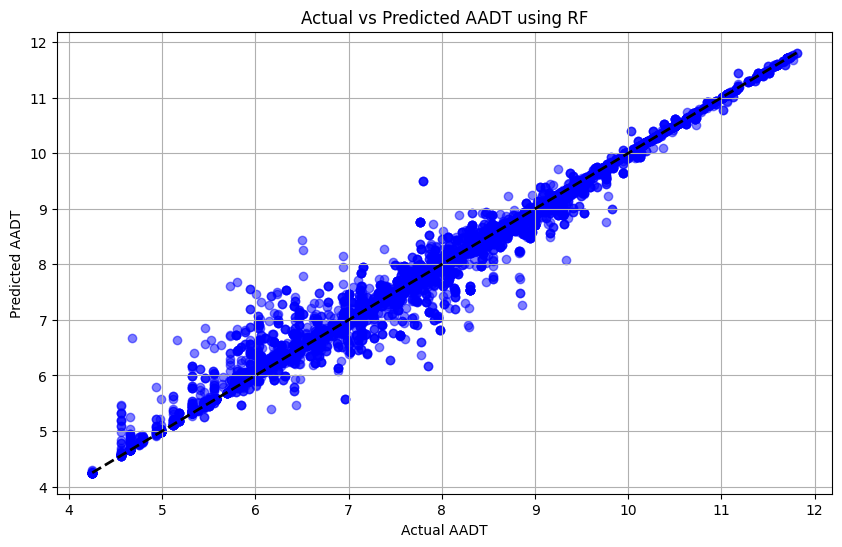

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted AADT using RF')
plt.xlabel('Actual AADT')
plt.ylabel('Predicted AADT')
plt.grid(True)
plt.plot([y_pred.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()